In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("multiple_linear_regression.csv")
data = data.dropna()

In [3]:
data.sample(5)

,Feature 1,Feature 2,Feature 3,Target
158,11.7,36.9,45.2,7.3
195,38.2,3.7,13.8,7.6
87,110.7,40.6,63.2,16.0
1,44.5,39.3,45.1,10.4
59,210.7,29.5,9.3,18.4


In [171]:
x = data.iloc[: , data.columns != "Target"]
y = data.iloc[: , data.columns == "Target"]

# x = x.iloc[: ,x.columns != "Feature 3"]


In [205]:
from sklearn.model_selection import train_test_split
train_input , test_input , train_output , test_output = train_test_split(x,y,test_size = 0.2 , random_state = 43)

In [207]:
print(train_input.shape,
train_output.shape,
test_input.shape,
test_input.shape)


(160, 3) (160, 1) (40, 3) (40, 3)


In [177]:

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(train_input , train_output)
print(lr_model.coef_,lr_model.intercept_)


[[ 0.04536767  0.18669444 -0.00052201]] [2.98466028]


Text(0, 0.5, 'Ouput/Predictions')

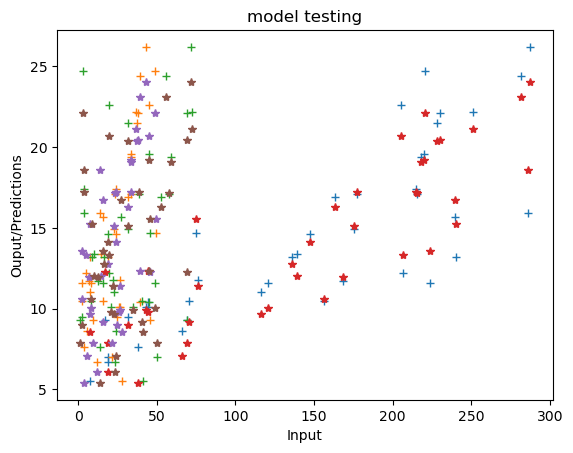

In [179]:
test_predictions= lr_model.predict(test_input)
plt.plot(test_input , test_output , "+")
plt.plot(test_input , test_predictions , "*")
plt.title("model testing")
plt.xlabel("Input")

plt.ylabel("Ouput/Predictions")

In [252]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(test_output,test_predictions)

cost*len(test_output)

82.20099173765428

## Homoscedasticity

In [11]:
residuals = test_output - test_predictions


Text(0.5, 1.0, 'relationship b|w predictions and residuals')

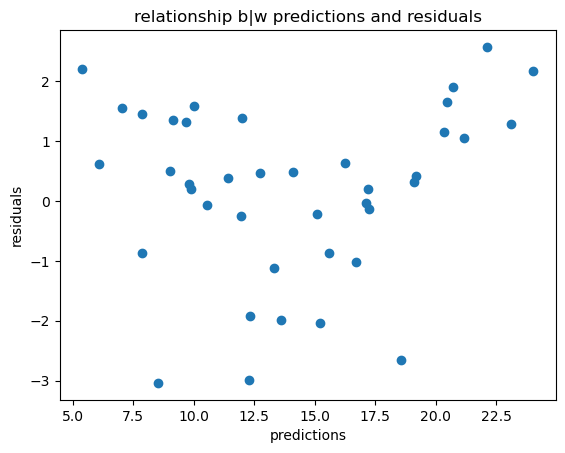

In [12]:
# no relation between the residual and predictions
plt.scatter(test_predictions , residuals)
plt.xlabel("predictions")
plt.ylabel("residuals")
plt.title("relationship b|w predictions and residuals")

C:\Users\aman1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

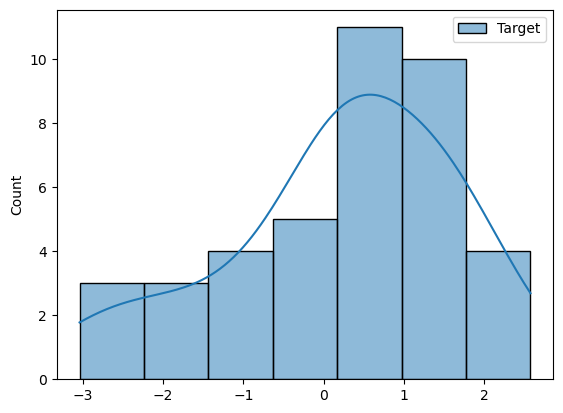

In [13]:
# uniformlly distributed residual

sns.histplot(residuals, kde=True) 


## OLS Ordinary Least Square

In [29]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [225]:
import statsmodels.api as sm


In [227]:
train_input = train_input.iloc[: ,train_input.columns != "Feature 3"]
train_input

,Feature 1,Feature 2
116,139.2,14.3
138,43.0,25.9
155,4.1,11.6
82,75.3,20.3
160,172.5,18.1
...,...,...
58,210.8,49.6
21,237.4,5.1
49,66.9,11.7
64,131.1,42.8


In [229]:
train_input_with_constant = sm.add_constant(train_input)

In [231]:
model = sm.OLS( train_output,train_input_with_constant)
result = model.fit()

In [233]:
result.params

const        2.975001
Feature 1    0.045363
Feature 2    0.186458
dtype: float64

In [235]:
lr_model.coef_ 

array([[ 0.04536767,  0.18669444, -0.00052201]])

In [237]:
lr_model.intercept_

array([2.98466028])

##### before removing column feature 3

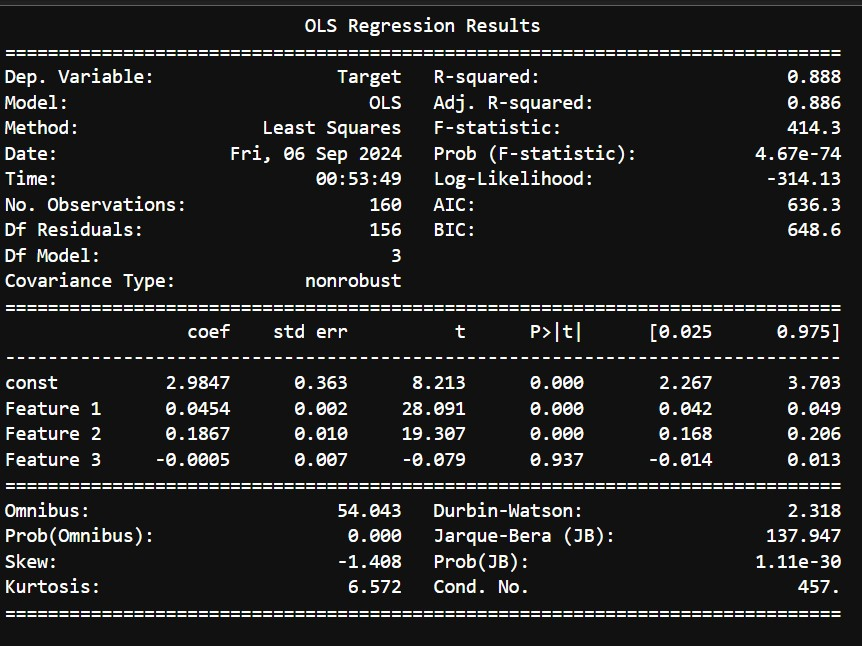

##### after removing column feature 3

In [240]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     625.4
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           1.66e-75
Time:                        01:22:53   Log-Likelihood:                -314.14
No. Observations:                 160   AIC:                             634.3
Df Residuals:                     157   BIC:                             643.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9750      0.341      8.726      0.0

In [256]:
rss = sum(result.resid**2)
rss

475.32855180774226